# Telecommunication Churn Rate Project 

Technology has evolved in leaps and bounds since the time of the first computers. To support the growth, so too has the telecommunications industry evolved. Business as usual for telecommunications has been disrupted as new ideas, trends, and usage have surged the industry forward. Consumers continue to display an insatiable appetite for telecommunication services. With more data-heavy applications securing their place in consumers’ daily lives, we only expect this trend to continue1. 
 
However, for any service company that bills on a recurring basis, a key variable is the rate of churn. Customer churn occurs when customers or subscribers stop doing business with a company or service, also known as customer attrition. One industry in which churn rates are particularly useful is the telecommunications industry, because most customers have multiple options from which to choose within a geographic location. The main revenue stream for wireless carriers is represented by individual user subscription packs and related services, which is usually shown in one of the industry’s key figures – ARPU (average revenue per user). 

To better anticipate their customer’s needs, balance the competitive landscape and possibly stabilize pricing, telecom companies will likely be looking to understand customer behavior and search for new opportunities. With this dataset, I intend to analyze customer behavior as pertains to the monthly churn rate from their service providers. The churn rate is used as an indicator of the health and loyalty of a company’s subscriber base and the lower the churn rate, the better the outlook is for the company.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt

# Loading datasets.

In [3]:
telco = pd.read_csv('https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv', sep = ',',na_values=' ')#()=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn'])
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Male',
       'Male', 'Male'],
      dtype='object')

In [6]:
mall = pd.read_csv('https://tufts.box.com/shared/static/w2xf5yv5wczx7rfmdmbjpfd1u604hhvo.csv')#, sep = ',',na_values=' ')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Cleaning Data

### Replacing column values 'Male to 1' , 'Female to 2' and 'Yes to 1' and 'No to 2'

In [6]:
telco.gender.loc[telco.gender == 'Male'] = 1
telco.gender.loc[telco.gender == 'Female'] = 2

telco.Partner.loc[telco.Partner == 'Yes'] = 1
telco.Partner.loc[telco.Partner == 'No'] = 2

telco.Dependents.loc[telco.Dependents == 'Yes'] = 1
telco.Dependents.loc[telco.Dependents == 'No'] = 2

telco.PhoneService.loc[telco.PhoneService == 'Yes'] = 1
telco.PhoneService.loc[telco.PhoneService == 'No'] = 2

telco.PaperlessBilling.loc[telco.PaperlessBilling == 'Yes'] = 1
telco.PaperlessBilling.loc[telco.PaperlessBilling == 'No'] = 2

telco.head()

/miniconda3/envs/em212/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2,0,1,2,1,2,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,2,2,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,2,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,2,2,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,2,2,45,2,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,2,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,0,2,2,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


The “PhoneService” column checks whether a client is subscribed for data and SMS plan and can either have Yes or No. Consequently, if a client does not have a phone service, they cannot have “MultipleLines”. 

For “InternetService”, a client could either have DSL, Fiber optic or no subscription to this. In the event that they are not subscribed for internet services, the entries in the “OnlineSecurity”, “OnlineBackup”, “DeviceProtection”, “TechSupport”, “streamingTV”, “streamingMovies” columns are No by default. 

In [7]:
telco.MultipleLines.loc[telco.MultipleLines == 'No phone service'] = 'No'
telco.OnlineSecurity.loc[telco.OnlineSecurity == 'No internet service'] = 'No'
telco.OnlineBackup.loc[telco.OnlineBackup == 'No internet service'] = 'No'
telco.DeviceProtection.loc[telco.DeviceProtection == 'No internet service'] = 'No'
telco.TechSupport.loc[telco.TechSupport == 'No internet service'] = 'No'
telco.StreamingTV.loc[telco.StreamingTV == 'No internet service'] = 'No'
telco.StreamingMovies.loc[telco.StreamingMovies == 'No internet service'] = 'No'

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2,0,1,2,1,2,No,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,2,2,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,2,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,2,2,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,2,2,45,2,No,DSL,Yes,...,Yes,Yes,No,No,One year,2,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,0,2,2,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


Changed PaymentMethod (which contains 4 entries i.e mailed check, electronic check, credit card (automatic) and bank transfer (automatic)) into dummy variables and dropped one of the values since I only needed n−1 out of the 4 categories to represent the data.

In [8]:
telco = pd.concat([telco, pd.get_dummies(telco.PaymentMethod, drop_first=True)], axis=1)
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,2,0,1,2,1,2,No,DSL,No,...,No,Month-to-month,1,Electronic check,29.85,29.85,No,0,1,0
1,5575-GNVDE,1,0,2,2,34,1,No,DSL,Yes,...,No,One year,2,Mailed check,56.95,1889.50,No,0,0,1
2,3668-QPYBK,1,0,2,2,2,1,No,DSL,Yes,...,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,0,0,1
3,7795-CFOCW,1,0,2,2,45,2,No,DSL,Yes,...,No,One year,2,Bank transfer (automatic),42.30,1840.75,No,0,0,0
4,9237-HQITU,2,0,2,2,2,1,No,Fiber optic,No,...,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,0,1,0


Rows with missing values will be omited from the analysis. The TotalCharges column contains null values. 

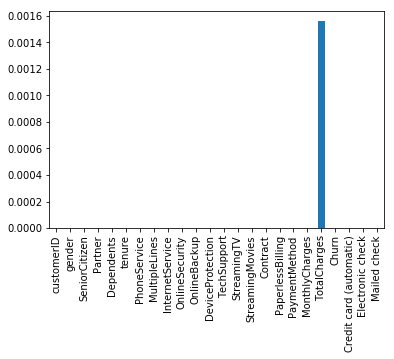

In [9]:
(telco.isnull().sum()/len(telco)).plot(kind='bar')

# Analyzing Datasets

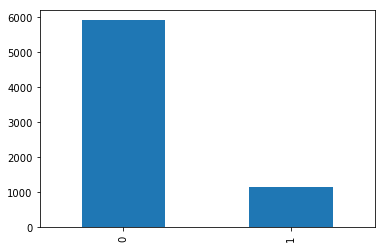

In [15]:
telco['SeniorCitizen'].value_counts().plot(kind='bar')

### Majority of the clients spend less than $40 per month on telecommunication services.

This value is still high because according to the 2014 International Market Communications Report, published by the UK’s Office of Communications (known as Ofcom), the average mobile customer in the United States paid roughly $47 per connection, more than cell users in any other nation surveyed. This is attributed to the fact that Americans tend to use more data than people in other nations. According to data from Cisco, U.S. mobile customers used an average of 1.3 gigabytes of data per month in 2013. In comparison, Europeans used 700 megabytes of data per month—roughly half the American average—and mobile customers in the Middle East and Africa used just 185 megabytes.

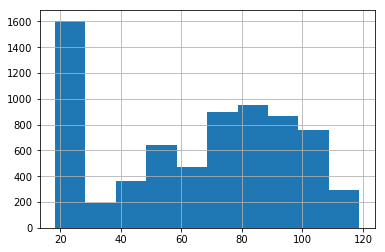

In [10]:
telco.MonthlyCharges.hist()

In [11]:
PaymentMethod_ranking = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
print(PaymentMethod_ranking)
Contract_ranking = ['Month-to-month' ,'One year', 'Two year']
print(Contract_ranking)

['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
['Month-to-month', 'One year', 'Two year']


In [12]:
columns_n_orders = {'PaymentMethod': PaymentMethod_ranking, 'Contract': Contract_ranking}

for column, ordering in columns_n_orders.items():
    telco.loc[:,column] = telco.loc[:,column]\
    .astype('category', ordered=True, categories=ordering)

/miniconda3/envs/em212/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


### Majority of customers prefer month-to month mode of payment 

This is in tandem with the research findings from ACI (https://www.aciworldwide.com/news-and-events/press-releases/2017/january/americans-pay-more-than-half-of-their-bills-online)which show that only 32 percent of bills are set up on a recurring basis and the remaining 68 percent are made as one-time payments.

Text(0, 0.5, '')

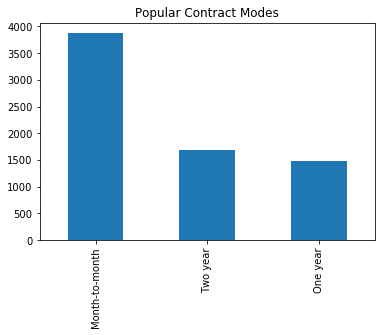

In [15]:
telco['Contract'].value_counts().plot(kind='bar')
plt.title('Popular Contract Modes')
plt.ylabel('')

## Among the 3 payment methods (i.e. bank transfer, credit card and mailed check) the two year contract payment schedule recorded the highest amount of revenue for telecommunication providers except when it came to mailed check. 

This could be attributed to the fact that senior citizens who still pay bills through the mail made up a small population of the total dataset.

In [4]:
telco.groupby(['PaymentMethod','Contract'])['TotalCharges'].sum(level=[0,1])

PaymentMethod              Contract      
Bank transfer (automatic)  Month-to-month    1111708.30
                           One year          1295385.60
                           Two year          2341186.00
Credit card (automatic)    Month-to-month     980596.20
                           One year          1336188.15
                           Two year          2354809.00
Electronic check           Month-to-month    2721957.80
                           One year          1337085.70
                           Two year           885859.75
Mailed check               Month-to-month     491599.20
                           One year           498394.05
                           Two year           701398.95
Name: TotalCharges, dtype: float64

## Gender balance is averagely equally spread out among our customers with males spending slightly more than females on all telco services.

In [5]:
telco.groupby(['gender'])['TotalCharges'].sum().reset_index()

,gender,TotalCharges
0,Female,7952354.2
1,Male,8103814.5


## Among the payment methods available, the use of electronic check is the most popular. This could also be attributed to the fact that majority of our respondents for this dataset consist of a young demographic. 

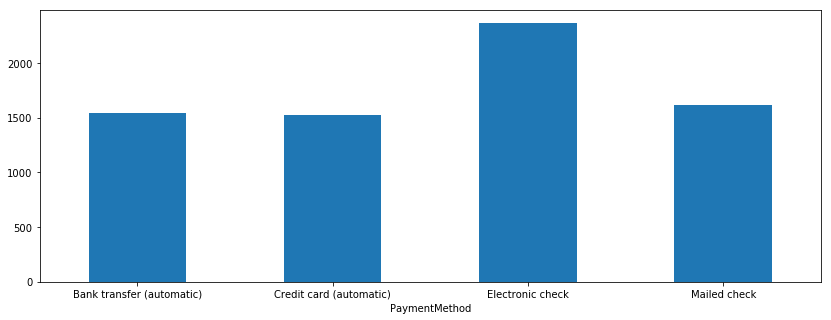

In [127]:
telco.groupby("PaymentMethod")["Churn"].count().plot.bar(rot=0, figsize=(14, 5))

### Majority of customers churn within the first couple of months (0-10 months) of subscribing to the service. This is valuable data to the telco provider because they can allocate more resources towards incentivizing clients to stay longer than just a few months. Thereafter, their tenure rate is fairly stable. There is also a high number of customers that remain loyal to their telco provider (70 months). 

Text(0.5, 0, 'tenure')

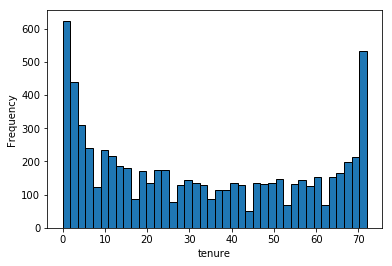

In [138]:
telco["tenure"].plot.hist(bins=40, edgecolor="k")
plt.xlabel('tenure')

# Merging Datasets

In [1]:
#mall.join([telco], how='inner', on=None)
#telco = pd.concat([telco, pd.get_dummies(telco.gender, drop_first=True)], axis=1)
#telco.head()

#merged=pd.merge(telco, mall, left_on='gender', right_on='Gender')
#merged.tail()

In [4]:
#merged.columns

In [5]:
#merged.groupby("Age")["Spending Score (1-100)"].count().plot.bar(rot=0, figsize=(14, 5))

In [6]:
#ax2 = merged.plot.scatter(x='Age', y='Spending Score (1-100)')

There is an even spread of monthly spend across age demographic. We are also missing data for the ~60 agegroup.

In [7]:
#ax2 = merged.plot.scatter(x='Age', y='MonthlyCharges')